

# Project: Data Science Blog Post - DSND (FBI gun data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Business understanding">Business understanding</a></li>
<li><a href="#Data understanding">Data understanding</a></li>
<li><a href="#Data preparation">Data preparation</a></li>
<li><a href="#Modeling">Data Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Evaluation ">Evaluation</a></li>

</ul>

<a id='intro'></a>
# Introduction

"The National Instant Criminal Background Check System, or NICS, is all about saving lives and protecting people from harm—by not letting guns fall into the wrong hands. It also ensures the timely transfer of firearms to eligible gun buyers. Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 230 million such checks have been made, leading to more than 1.3 million denials".
 This project is the fourth project of data sciences Udacity's Nanodegree program.
In this project, we will follow the CRISP-DM process (Cross Industry Process for Data Mining). CRISP-DM stands for:


- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment


<a id='Business understanding'></a>

# Business understanding

In this project, I will focus to find out:

- The highest rate of Hispanic or Latino, percent July 2016 V2016
-  The rate of handguns on each state.
-   The month which occurred the largest rate of long gun purchases.
- The state with least affected by a total of purchase of guns.
- The highest gun purchase for each prospective buyer.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(12,7)
import numpy as np
import statsmodels.api as sms;
import matplotlib.pyplot as plt


In [12]:
# Read in the data

df=pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv')
census_data=pd.read_csv('OneDrive/Desktop/project/u.s.-census-data.csv')



In [13]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-05,Alabama,30221.0,643.0,6448.0,4041.0,271.0,342,0.0,13.0,...,0.0,0.0,0.0,14.0,8.0,2.0,0.0,0.0,0.0,43908
1,2019-05,Alaska,264.0,6.0,2716.0,2440.0,287.0,199,0.0,0.0,...,0.0,0.0,0.0,25.0,21.0,0.0,0.0,0.0,0.0,6376
2,2019-05,Arizona,6745.0,517.0,11969.0,5987.0,1242.0,724,0.0,12.0,...,1.0,0.0,0.0,19.0,10.0,0.0,0.0,1.0,0.0,28950
3,2019-05,Arkansas,3582.0,751.0,4600.0,3499.0,293.0,421,0.0,13.0,...,0.0,0.0,0.0,8.0,11.0,2.0,1.0,0.0,0.0,15317
4,2019-05,California,45237.0,0.0,36314.0,24718.0,4700.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111816


<a id='Data understanding'></a>

# Data understanding


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 27 columns):
month                        13585 non-null object
state                        13585 non-null object
permit                       13561 non-null float64
permit_recheck               2200 non-null float64
handgun                      13565 non-null float64
long_gun                     13566 non-null float64
other                        6600 non-null float64
multiple                     13585 non-null int64
admin                        13562 non-null float64
prepawn_handgun              11642 non-null float64
prepawn_long_gun             11640 non-null float64
prepawn_other                6215 non-null float64
redemption_handgun           11645 non-null float64
redemption_long_gun          11644 non-null float64
redemption_other             6215 non-null float64
returned_handgun             3300 non-null float64
returned_long_gun            3245 non-null float64
returned_other   

In [15]:

# split the data after '-' in month column to year
df['year'] = df['month'].apply(lambda x: x.split("-")[0]).astype(int)

#split the data after '-' in year column to month
df['months'] = df['month'].apply(lambda x: x.split("-")[1]).astype(int)

df.head(1)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2019-05,Alabama,30221.0,643.0,6448.0,4041.0,271.0,342,0.0,13.0,...,0.0,14.0,8.0,2.0,0.0,0.0,0.0,43908,2019,5


In [16]:
census_data.head()
# Drop unsed column such as fact Note column.

df=df.drop('month',axis=1)

In [17]:
df.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,Alabama,30221.0,643.0,6448.0,4041.0,271.0,342,0.0,13.0,11.0,...,0.0,14.0,8.0,2.0,0.0,0.0,0.0,43908,2019,5
1,Alaska,264.0,6.0,2716.0,2440.0,287.0,199,0.0,0.0,1.0,...,0.0,25.0,21.0,0.0,0.0,0.0,0.0,6376,2019,5
2,Arizona,6745.0,517.0,11969.0,5987.0,1242.0,724,0.0,12.0,4.0,...,0.0,19.0,10.0,0.0,0.0,1.0,0.0,28950,2019,5
3,Arkansas,3582.0,751.0,4600.0,3499.0,293.0,421,0.0,13.0,5.0,...,0.0,8.0,11.0,2.0,1.0,0.0,0.0,15317,2019,5
4,California,45237.0,0.0,36314.0,24718.0,4700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111816,2019,5


<a id='Data preparation'></a>
## Data preparation

**In this section of the report, we will check for cleanliness,we will  trim and clean our dataset for analysis.**


### drop rows with missing values

In [18]:
df.isnull().sum()

state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
year                             0
months                           0
dtype: int64

In [19]:
df.shape

(13585, 28)

In [20]:
census_data.shape

(85, 52)

In [21]:
#missing_val = census_data.isnull().sum()
#missing_val[missing_val>20]

In [22]:
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [23]:
missing_val = df.isnull().sum()
missing_val[missing_val>0]


permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
dtype: int64

In [24]:
#calculate percentage of missing values
missing_percentage = missing_val/(len(df))*100
missing_percentage.sort_values(inplace=True)

In [25]:
missing_percentage

state                         0.000000
totals                        0.000000
year                          0.000000
multiple                      0.000000
months                        0.000000
long_gun                      0.139860
handgun                       0.147221
admin                         0.169304
permit                        0.176665
redemption_handgun           14.280456
redemption_long_gun          14.287817
prepawn_handgun              14.302540
prepawn_long_gun             14.317262
other                        51.417004
redemption_other             54.251012
prepawn_other                54.251012
private_sale_handgun         71.659919
private_sale_long_gun        71.659919
private_sale_other           71.659919
return_to_seller_long_gun    71.659919
return_to_seller_handgun     73.684211
return_to_seller_other       75.303644
returned_handgun             75.708502
returned_long_gun            76.113360
returned_other               78.542510
permit_recheck           

In [26]:
#calculate percentage of missing values
missing_percentage = missing_val/(len(census_data))*100
missing_percentage.sort_values(inplace=True)

In [27]:
missing_percentage

state                            0.000000
totals                           0.000000
year                             0.000000
multiple                         0.000000
months                           0.000000
long_gun                        22.352941
handgun                         23.529412
admin                           27.058824
permit                          28.235294
redemption_handgun            2282.352941
redemption_long_gun           2283.529412
prepawn_handgun               2285.882353
prepawn_long_gun              2288.235294
other                         8217.647059
redemption_other              8670.588235
prepawn_other                 8670.588235
private_sale_handgun         11452.941176
private_sale_long_gun        11452.941176
private_sale_other           11452.941176
return_to_seller_long_gun    11452.941176
return_to_seller_handgun     11776.470588
return_to_seller_other       12035.294118
returned_handgun             12100.000000
returned_long_gun            12164

In [28]:
#Drop null values from each file
df.dropna(inplace=True)
census_data.dropna(inplace=True)

In [29]:
#check for null values, the result sould be False
df.isnull().sum().any()

False

In [30]:
#check for null values, the result sould be False
census_data.isnull().sum().any()

False


### Data Cleaning (for  Gun_Data, and Census_Data)

In this part we will clean our data by remove null and duplicate values in each file

In [31]:
#print duplicated values, if the result =0, there is no need to  use method drop_duplicatesprint(df.duplicated().sum())
print(df.duplicated().sum())
print(census_data.duplicated().sum())


0
0


In [32]:
# Drop unsed column such as fact Note column.

census_data =census_data.drop('Fact Note',axis=1)

In [33]:
#Check for null values after drop fact note
census_data.isnull().sum().sum()

0

In [34]:
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,2.90%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%


In [35]:
#Index fact
census_data.set_index('Fact',inplace=True)
census_data = census_data.T.reset_index()
census_data.head()

Fact,index,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145","98,540","1,634,391","67,370,353",1.90%
1,Alaska,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,"2,221,335","6,375,483",D,"5,216,303","10,474,275","$14,320","20,907","267,999","15,643,303",0.40%
2,Arizona,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,"13,996,635","37,055,881","51,243,473","69,437,272","84,716,542","$12,927","136,352","2,295,186","102,671,393",2.40%
3,Arkansas,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,"4,307,264","15,792,628","62,712,925","31,256,110","36,815,256","$12,483","65,175","1,003,113","39,451,191",1.10%
4,California,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%,"90,830,372","248,953,592","512,303,164","666,652,186","481,800,461","$12,665","908,120","14,325,377","856,954,246",3.50%


In [36]:
#rename the coulumn to (state)
census_data.rename(columns={'index':'state'},inplace = True)

In [37]:
census_data.head()

Fact,state,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145","98,540","1,634,391","67,370,353",1.90%
1,Alaska,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,"2,221,335","6,375,483",D,"5,216,303","10,474,275","$14,320","20,907","267,999","15,643,303",0.40%
2,Arizona,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,"13,996,635","37,055,881","51,243,473","69,437,272","84,716,542","$12,927","136,352","2,295,186","102,671,393",2.40%
3,Arkansas,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,"4,307,264","15,792,628","62,712,925","31,256,110","36,815,256","$12,483","65,175","1,003,113","39,451,191",1.10%
4,California,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%,"90,830,372","248,953,592","512,303,164","666,652,186","481,800,461","$12,665","908,120","14,325,377","856,954,246",3.50%


In [38]:
#convert srt to float datatype
census =  census_data.iloc[:,1:].columns
for c in census:
     census_data[c] =  census_data[c].str.extract('(\d+)').astype(float)
    
# check the changes
census_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
state                                                                                50 non-null object
White alone, percent, July 1, 2016,  (V2016)                                         50 non-null float64
Black or African American alone, percent, July 1, 2016,  (V2016)                     50 non-null float64
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)             50 non-null float64
Asian alone, percent, July 1, 2016,  (V2016)                                         50 non-null float64
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)    46 non-null float64
Hispanic or Latino, percent, July 1, 2016,  (V2016)                                  50 non-null float64
Total accommodation and food services sales, 2012 ($1,000)                           50 non-null float64
Total health care and social assistance receipts/revenue, 

In [39]:
for column in census_data.columns:
    if 'percent' in column:
        census_data[column] = census_data[column]/100

In [40]:
census_data.describe()

Fact,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
count,50.000000,50.000000,50.000000,50.000000,46.000000,50.000000,5.000000e+01,5.000000e+01,4.800000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01,5.000000e+01,49.000000
mean,0.599000,0.079400,0.008000,0.032400,0.002609,0.085200,3.213317e+06,1.064614e+07,2.776451e+07,2.305322e+07,2.040477e+07,3353.660000,37739.040000,6.102580e+05,3.062786e+07,0.013469
std,0.360115,0.098071,0.023474,0.056697,0.014823,0.097043,8.625175e+06,2.898579e+07,6.795810e+07,6.159037e+07,5.157480e+07,6160.518245,98728.831385,1.586183e+06,8.829298e+07,0.012509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,3.000000e+00,9.000000e+00,5.000000e+00,9.000000e+00,12.000000,20.000000,1.000000e+00,1.000000e+01,0.000000
25%,0.335000,0.000000,0.000000,0.000000,0.000000,0.010000,4.250000e+00,1.425000e+01,5.075000e+01,3.025000e+01,3.725000e+01,13.000000,63.500000,2.000000e+00,4.075000e+01,0.000000
50%,0.770000,0.040000,0.000000,0.020000,0.000000,0.055000,1.300000e+01,4.000000e+01,1.195000e+02,8.200000e+01,8.100000e+01,14.000000,146.500000,1.200000e+01,1.150000e+02,0.010000
75%,0.867500,0.117500,0.010000,0.040000,0.000000,0.110000,8.100000e+01,2.222500e+02,2.816066e+06,6.847500e+02,4.497500e+02,18.500000,823.250000,9.120000e+02,7.722500e+02,0.020000
max,0.940000,0.370000,0.150000,0.370000,0.100000,0.390000,4.928551e+07,1.556661e+08,3.136300e+08,3.417350e+08,2.511677e+08,22183.000000,540298.000000,7.998994e+06,5.130833e+08,0.040000


In [41]:
new_labels = list(census_data.columns)
new_labels[1] ='White alone'
census_data.columns = new_labels

In [42]:
#change the name of new_labels = list(census_data.columns)
new_labels = list(census_data.columns)
new_labels[2] ='Black or African American alone'
census_data.columns = new_labels

In [43]:
new_labels = list(census_data.columns)
new_labels[3] ='American Indian and Alaska Native alone'
census_data.columns = new_labels

In [44]:
new_labels = list(census_data.columns)
new_labels[4] ='Asian alone'
census_data.columns = new_labels

In [45]:
new_labels = list(census_data.columns)
new_labels[5] ='Native Hawaiian and Other Pacific Islander alone'
census_data.columns = new_labels

In [46]:
new_labels = list(census_data.columns)
new_labels[6] ='Hispanic or Latino'
census_data.columns = new_labels

In [47]:
new_labels = list(census_data.columns)
new_labels[7] ='Total accommodation and food services sales 2012'
census_data.columns = new_labels

In [48]:
census_data.head()

,state,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Total accommodation and food services sales 2012,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,0.69,0.26,0.00,0.01,0.00,0.04,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
1,Alaska,0.66,0.03,0.15,0.06,0.01,0.07,2.0,6.0,NaN,5.0,10.0,14.0,20.0,267.0,15.0,0.00
2,Arizona,0.83,0.04,0.05,0.03,0.00,0.30,13.0,37.0,51.0,69.0,84.0,12.0,136.0,2.0,102.0,0.02
3,Arkansas,0.79,0.15,0.01,0.01,0.00,0.07,4.0,15.0,62.0,31.0,36.0,12.0,65.0,1.0,39.0,0.01
4,California,0.72,0.06,0.01,0.14,0.00,0.38,90.0,248.0,512.0,666.0,481.0,12.0,908.0,14.0,856.0,0.03


In [49]:
#total_gun = df.groupby(df['year'])['totals'].sum().reset_index()

In [50]:
#plt.subplots(figsize = (10,5))
#plt.bar(total_gun['year'],total_gun['totals'])
#plt.title('Number of Gun Registrations Per Year 2015-2018')
#plt.xlabel('Year')
#plt.ylabel('Total # of Gun Permits Issued')

In [51]:
#merge Two datasets
df_combined = df.merge(census_data, left_on='state', right_on='state', how='inner')

In [52]:
df_combined.sample(60)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,Total accommodation and food services sales 2012,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
187,Colorado,8736.0,0.0,26649.0,21168.0,1736.0,1285,0.0,0.0,0.0,...,13.0,29.0,50.0,77.0,67.0,13.0,161.0,2.0,117.0,0.03
1204,Oklahoma,8.0,0.0,15682.0,12018.0,2117.0,1229,2.0,25.0,13.0,...,7121153.0,22795438.0,74295394.0,71892946.0,50256231.0,13174.0,93093.0,1370988.0,59124620.0,0.00
397,Idaho,11559.0,3.0,3645.0,3698.0,184.0,184,1.0,3.0,5.0,...,2.0,7.0,20.0,17.0,20.0,12.0,44.0,546.0,21.0,0.03
303,Florida,23891.0,0.0,50003.0,27010.0,3908.0,2302,0.0,18.0,7.0,...,49.0,124.0,96.0,252.0,273.0,14.0,532.0,7.0,337.0,0.04
1536,Virginia,1263.0,79.0,22204.0,19747.0,3138.0,0,0.0,0.0,0.0,...,17.0,47.0,96.0,86.0,110.0,13.0,197.0,3.0,165.0,0.01
1430,Texas,34837.0,0.0,55222.0,31747.0,4092.0,2938,63.0,87.0,44.0,...,54.0,145.0,702.0,691.0,356.0,13.0,569.0,10.0,521.0,0.03
894,Nebraska,2973.0,3.0,91.0,1090.0,16.0,1,0.0,0.0,1.0,...,3.0,12.0,57.0,42.0,30.0,16.0,53.0,870.0,36.0,0.02
1575,Washington,12764.0,54.0,15069.0,9423.0,1865.0,574,3.0,10.0,11.0,...,14.0,43.0,131.0,83.0,118.0,17.0,182.0,2.0,149.0,0.02
128,Arkansas,4775.0,740.0,7907.0,6010.0,281.0,454,31.0,10.0,14.0,...,4.0,15.0,62.0,31.0,36.0,12.0,65.0,1.0,39.0,0.01
828,Missouri,710.0,0.0,15576.0,10536.0,1334.0,770,0.0,6.0,8.0,...,12.0,40.0,111.0,91.0,90.0,15.0,158.0,2.0,109.0,0.01


In [53]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 44 columns):
state                                                                      1700 non-null object
permit                                                                     1700 non-null float64
permit_recheck                                                             1700 non-null float64
handgun                                                                    1700 non-null float64
long_gun                                                                   1700 non-null float64
other                                                                      1700 non-null float64
multiple                                                                   1700 non-null int64
admin                                                                      1700 non-null float64
prepawn_handgun                                                            1700 non-null float64
prepawn_long_gun       

In [54]:
df_combined.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year', 'months', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Hispanic or Latino',
       'Total accommodation and food services sales 2012',
       'Total health care and social assistance receipts/revenue, 2012 ($1,000)',
       'Total manufacturers shipments, 2012 ($1,000)',
       'Total merchant wholesaler sales, 2012 (

In [55]:
df_combined.shape

(1700, 44)

In [56]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 44 columns):
state                                                                      1700 non-null object
permit                                                                     1700 non-null float64
permit_recheck                                                             1700 non-null float64
handgun                                                                    1700 non-null float64
long_gun                                                                   1700 non-null float64
other                                                                      1700 non-null float64
multiple                                                                   1700 non-null int64
admin                                                                      1700 non-null float64
prepawn_handgun                                                            1700 non-null float64
prepawn_long_gun       

In [57]:
df_combined.isnull().sum().sum()


238

In [58]:
df_combined.head(50)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,Total accommodation and food services sales 2012,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,30221.0,643.0,6448.0,4041.0,271.0,342,0.0,13.0,11.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
1,Alabama,26958.0,666.0,6747.0,4538.0,265.0,240,0.0,6.0,15.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
2,Alabama,31811.0,619.0,9991.0,6439.0,348.0,360,0.0,19.0,7.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
3,Alabama,28831.0,332.0,8278.0,5353.0,302.0,451,0.0,5.0,13.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
4,Alabama,29977.0,266.0,6671.0,5507.0,343.0,260,0.0,14.0,17.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
5,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,10.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
6,Alabama,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,18.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
7,Alabama,23244.0,1.0,5218.0,5918.0,229.0,279,0.0,10.0,14.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
8,Alabama,19471.0,0.0,4978.0,5832.0,241.0,271,0.0,15.0,6.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
9,Alabama,22465.0,0.0,5991.0,5741.0,218.0,274,0.0,12.0,6.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01


### Question 1:

**what is the states with the highest number of Hispanic or Latino, percent July 2016 V2016?**

C:\Users\farah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


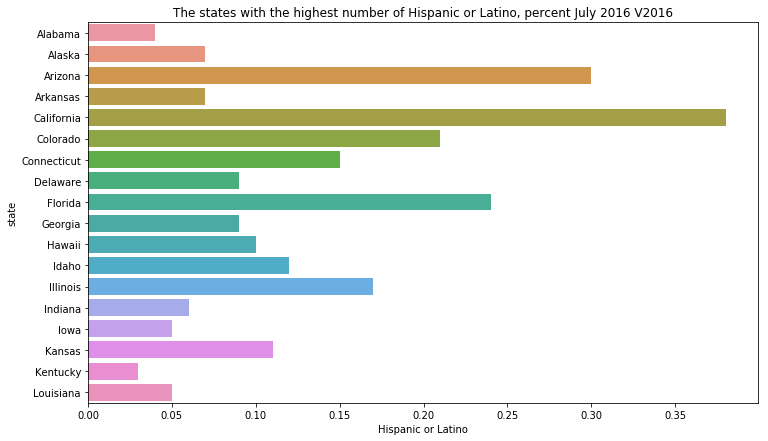

In [59]:
sns.barplot(y='state', x='Hispanic or Latino' ,data=df_combined[:600]).set_title('The states with the highest number of Hispanic or Latino, percent July 2016 V2016');
plt.rcParams['figure.figsize']=(12,7)

<a id='eda'></a>
### Answer:

**After the data become ready for display, we wanted to know which state contains the highest number of Hispanic or Latino, percent July 2016 V2016.
As the graph illustrates, California has the largest number of them.**

###  Question 2:
#### In this question, we would like to know how many handguns are available against the number of states.

In [60]:
df_total= df_combined.groupby(['state'])['handgun'].mean()
df_total.sort_values()

state
Hawaii                0.000000
Nebraska            133.294118
Iowa                188.941176
Rhode Island       1065.617647
Vermont            1494.852941
North Carolina     1509.500000
North Dakota       1593.852941
Wyoming            1791.617647
Delaware           1793.382353
South Dakota       2558.617647
Alaska             2829.176471
Montana            2838.500000
Maine              3341.705882
Utah               3714.147059
Idaho              3874.088235
Maryland           4308.470588
New Jersey         4662.558824
Nevada             4881.588235
Massachusetts      5083.264706
New Hampshire      5187.352941
Connecticut        5756.529412
New Mexico         5875.735294
Arkansas           5901.911765
Kansas             5924.294118
West Virginia      6629.676471
Minnesota          7626.264706
Alabama            7857.205882
Mississippi        8477.352941
New York           9820.764706
South Carolina    10112.441176
Kentucky          10337.235294
Louisiana         11232.764706
Mi

In [61]:
states = df_total.sort_values(ascending=False).head(100)
states 



state
Florida           51738.323529
Pennsylvania      47315.382353
Texas             46374.764706
California        40680.235294
Ohio              26052.647059
Tennessee         25016.382353
Illinois          24416.147059
Virginia          23125.176471
Indiana           20148.029412
Missouri          20017.852941
Colorado          18929.647059
Washington        17116.588235
Oregon            14192.500000
Georgia           14125.323529
Wisconsin         14038.500000
Arizona           12848.264706
Oklahoma          11934.911765
Michigan          11263.941176
Louisiana         11232.764706
Kentucky          10337.235294
South Carolina    10112.441176
New York           9820.764706
Mississippi        8477.352941
Alabama            7857.205882
Minnesota          7626.264706
West Virginia      6629.676471
Kansas             5924.294118
Arkansas           5901.911765
New Mexico         5875.735294
Connecticut        5756.529412
New Hampshire      5187.352941
Massachusetts      5083.264706
Ne

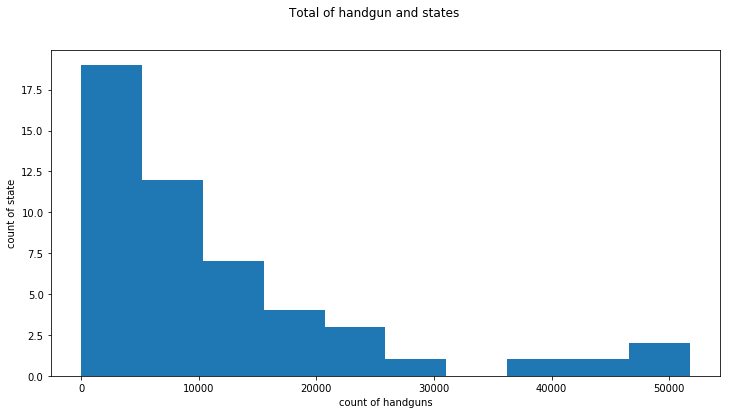

In [62]:
#state_And_handgun= df.groupby('state')['handgun'].sum()
fig = plt.figure(figsize=(12,6))
plt.hist(states)
fig.suptitle('Total of handgun and states')
plt.xlabel('count of handguns')
plt.ylabel('count of state')
plt.show();


### Answer :
**As we can see, the largest number of handguns was about 5,000. They were recorded in more than seventeen states.**

###  Question 3:
#### In this question, we would like to know the month which occurred the largest number of long gun purchases on?


In [63]:
total_of_long_gun_per_months = df_combined.groupby('months').sum().long_gun

total_of_long_gun_per_months

months
1     1048757.0
2     1211124.0
3     1437225.0
4     1085811.0
5      918935.0
6      622173.0
7      598620.0
8     1228866.0
9     1273666.0
10    1473666.0
11    1948529.0
12    2132758.0
Name: long_gun, dtype: float64

In [64]:
total_of_handg_gun_per_months=df_combined.groupby('months').sum().handgun
total_of_handg_gun_per_months

months
1     1573091.0
2     1975526.0
3     2254636.0
4     1717937.0
5     1525038.0
6     1039389.0
7      913622.0
8     1592521.0
9     1442069.0
10    1609179.0
11    2004703.0
12    2335358.0
Name: handgun, dtype: float64

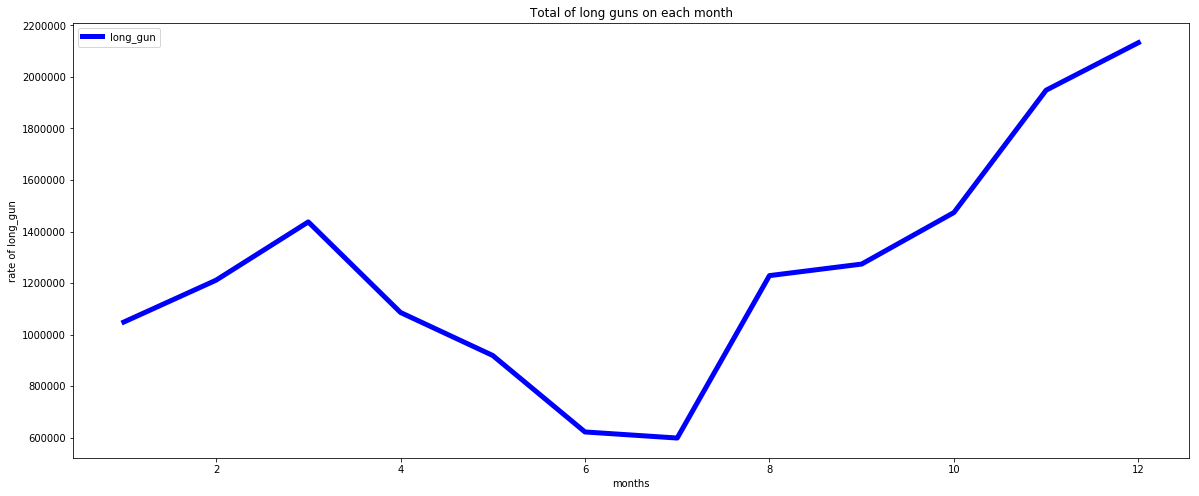

In [65]:
plt.figure(figsize=(20,8))
plt.plot(total_of_long_gun_per_months, color='blue',linewidth=5)
plt.xlabel('months')
plt.ylabel('rate of long_gun')
plt.title('Total of long guns on each month')
plt.legend()
plt.show;



### Answer:
#### We can notice that month of December recorded the highest purchase of long gun approximately with 2000000 total of purchase.


In [66]:
gun_alltime = df_combined.groupby(['year', 'state'])['totals'].sum()
gun_alltime

year  state         
2016  Alabama            239533
      Alaska              40744
      Arizona            185555
      Arkansas           120054
      California        1039015
      Colorado           236192
      Connecticut         93404
      Delaware            26233
      Florida            608567
      Georgia            261291
      Hawaii               6317
      Idaho               69405
      Illinois           782393
      Indiana            403314
      Iowa                76150
      Kansas              90405
      Kentucky          1434975
      Louisiana          188664
      Maine               52742
      Maryland            74707
      Massachusetts       96542
      Michigan           235926
      Minnesota          303783
      Mississippi        132693
      Missouri           257060
      Montana             60246
      Nebraska            38214
      Nevada              62345
      New Hampshire       69974
      New Jersey          51106
                   


### Question 4:
**which state is encompass least affected by total of purchase of gun?**

In [67]:
total=df_combined.groupby(['state'])['totals'].sum()
bottom10state=total.sort_values(ascending=False).head(10)
bottom10state

state
Kentucky        12718796
Illinois         6900391
Texas            4466690
California       4451067
Florida          3583636
Pennsylvania     3011032
Indiana          2859131
Ohio             2116632
Tennessee        2058751
Minnesota        1900204
Name: totals, dtype: int64

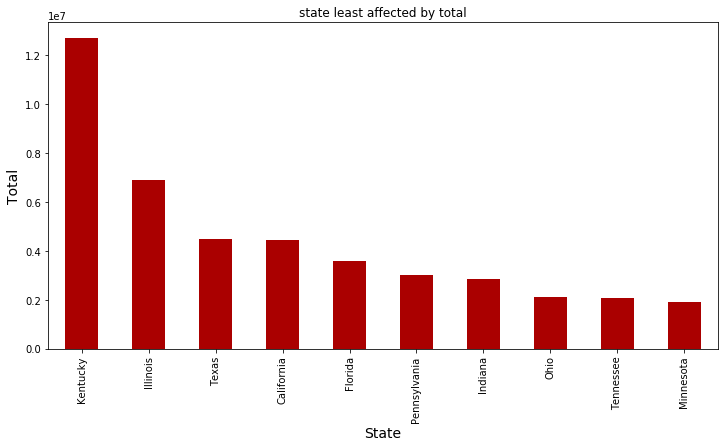

In [68]:
plt.figure(figsize=(12,6))
chart=bottom10state.plot(kind="bar", color='#AA0000', title= 'state least affected by total');
chart.set_xlabel('State', fontsize=14);
chart.set_ylabel('Total', fontsize=14);



### Answer :
**As we can see,the state encompass least affected by total is Minnesota with 1695534.**

In [69]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 44 columns):
state                                                                      1700 non-null object
permit                                                                     1700 non-null float64
permit_recheck                                                             1700 non-null float64
handgun                                                                    1700 non-null float64
long_gun                                                                   1700 non-null float64
other                                                                      1700 non-null float64
multiple                                                                   1700 non-null int64
admin                                                                      1700 non-null float64
prepawn_handgun                                                            1700 non-null float64
prepawn_long_gun       

In [70]:
total_by_state=df_combined.groupby(['state'])['White alone', 'Black or African American alone', 'American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','totals'].sum()
least=total_by_state.sort_values('totals').head(10)
least

,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,totals
state,,,,,,,
Hawaii,8.50,0.68,0.00,12.58,3.40,3.40,38693
Rhode Island,0.00,0.00,0.00,0.00,0.00,0.00,72323
Vermont,31.96,0.34,0.00,0.34,0.00,0.34,111801
Delaware,23.80,7.48,0.00,1.36,0.00,3.06,144882
Wyoming,31.28,0.34,0.68,0.34,0.00,3.40,167255
North Dakota,0.00,0.00,0.00,0.00,0.00,0.00,185009
Nebraska,29.92,1.70,0.34,0.68,0.00,3.40,216043
Alaska,22.44,1.02,5.10,2.04,0.34,2.38,230176
South Dakota,0.00,0.00,0.00,0.00,0.00,0.00,275796


In [71]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 44 columns):
state                                                                      1700 non-null object
permit                                                                     1700 non-null float64
permit_recheck                                                             1700 non-null float64
handgun                                                                    1700 non-null float64
long_gun                                                                   1700 non-null float64
other                                                                      1700 non-null float64
multiple                                                                   1700 non-null int64
admin                                                                      1700 non-null float64
prepawn_handgun                                                            1700 non-null float64
prepawn_long_gun       

###  Question 5:
#### What is highest gun purchase for each prospective buyer ?


In [72]:
new_labels = list(df_combined.columns)
new_labels[28] ='White alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels[29] ='Black or African American alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels[30] ='American Indian and Alaska Native alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels = list(df_combined.columns)
new_labels[31] ='Asian alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)

new_labels = list(df_combined.columns)
new_labels[32] ='Native Hawaiian and Other Pacific Islander alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels = list(df_combined.columns)
new_labels[33] ='Hispanic or Latino'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)



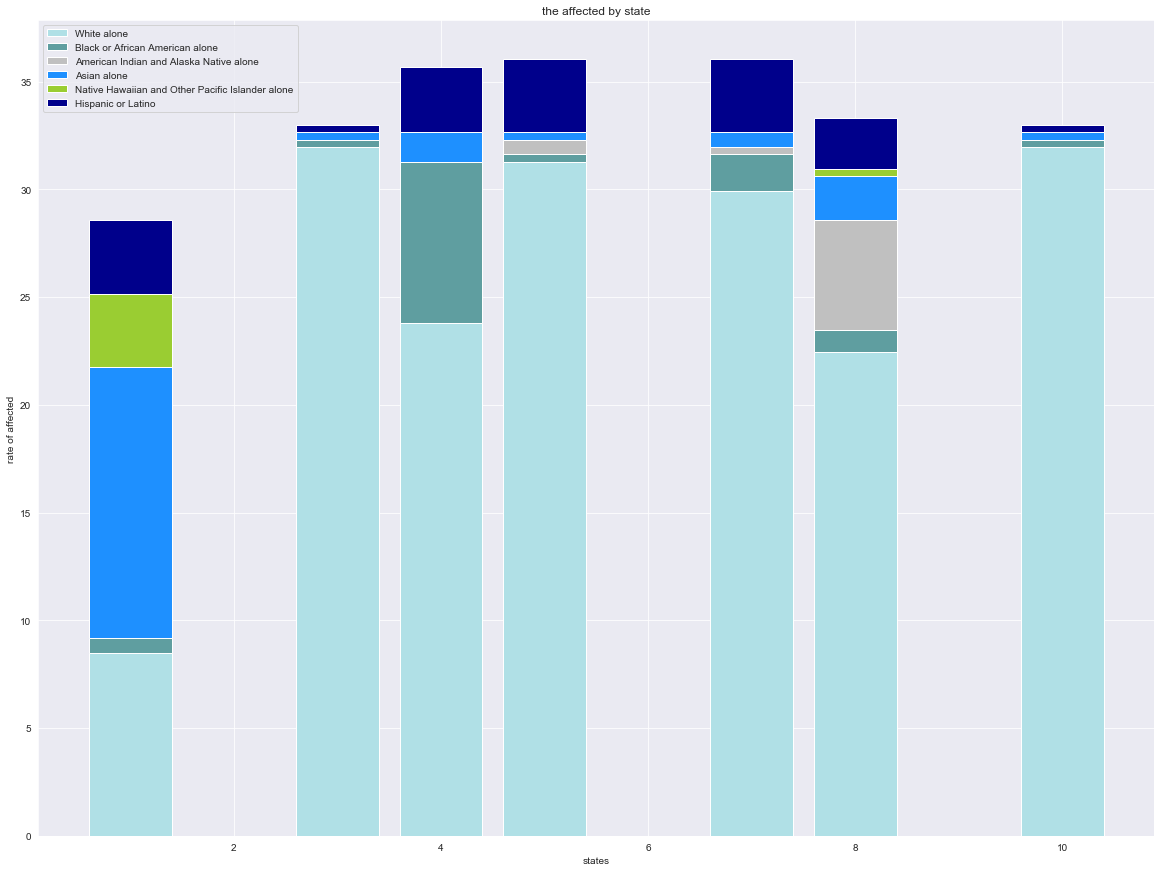

In [73]:
sns.set_style('darkgrid')
f, ax = plt.subplots(1,figsize=(20,15))
bar_1=[i+1 for i in range(len(least['White alone']))]

ax.bar(bar_1, least['White alone'], label ='White alone', color='powderblue', width=0.8)
ax.bar(bar_1, least['Black or African American alone'],bottom=least['White alone'], label ='Black or African American alone', color='cadetblue', width=0.8)
ax.bar(bar_1, least['American Indian and Alaska Native alone'], bottom=[i+j for i,j in zip(least['White alone'], least['Black or African American alone'])], label ='American Indian and Alaska Native alone', color='silver', width=0.8) 

ax.bar(bar_1, least['Asian alone'], bottom=[i+j+k for i,j,k in zip(least['White alone'], least['Black or African American alone'], least['American Indian and Alaska Native alone'])], label ='Asian alone', color='dodgerblue', width=0.8) 

ax.bar(bar_1, least['Native Hawaiian and Other Pacific Islander alone'], bottom=[i+j+k+l for i,j,k,l in zip(least['White alone'], least['Black or African American alone'],least['American Indian and Alaska Native alone'],least['Asian alone'])], label ='Native Hawaiian and Other Pacific Islander alone', color='yellowgreen', width=0.8) 

ax.bar(bar_1, least['Hispanic or Latino'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(least['White alone'], least['Black or African American alone'],least['American Indian and Alaska Native alone'],least['Asian alone'],least['Native Hawaiian and Other Pacific Islander alone'])], label ='Hispanic or Latino', color='darkblue', width=0.8) 

ax.set_title("the affected by state")
ax.set_xlabel("states")
ax.set_ylabel("rate of affected")

plt.legend(loc='upper left');


In [74]:
df_combined.set_index('state', inplace = True)

In [75]:

for i in df_combined.columns:
    df_combined[i].fillna(df_combined[i].median(), inplace=True)
    

In [76]:
df_combined.isnull().sum().sum()

0

In [77]:
from sklearn.preprocessing import StandardScaler, Imputer


In [78]:
#from sklearn import preprocessing as p
scaler = StandardScaler()
columns = df_combined.columns
df_combined = scaler.fit_transform(df_combined)
df_combined = pd.DataFrame(df_combined)
df_combined.columns = columns


In [79]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 43 columns):
permit                                                                     1700 non-null float64
permit_recheck                                                             1700 non-null float64
handgun                                                                    1700 non-null float64
long_gun                                                                   1700 non-null float64
other                                                                      1700 non-null float64
multiple                                                                   1700 non-null float64
admin                                                                      1700 non-null float64
prepawn_handgun                                                            1700 non-null float64
prepawn_long_gun                                                           1700 non-null float64
prepawn_other       

### Answer :

**Answer :
From the previous chart, we can notice that (Hispanic or Latino) with least number on each state but recorded the highest purchase of a gun, then (Asian alone) comparison to the other types of buyers. On the other hand (white alone) recorded the highest rate of the buyers of each state.**

<a id='Modeling'></a>

# Data Modeling

In [80]:
# Split data into X and Y


X = df_combined[['permit', 'permit_recheck',
                         'handgun', 'long_gun', 
                         'admin', 'prepawn_handgun',
                         'prepawn_long_gun', 'redemption_handgun', 'redemption_long_gun',
                         'returned_handgun', 'returned_long_gun','year','months', 'rentals_handgun', 'rentals_long_gun',
                         'private_sale_handgun', 'private_sale_long_gun', 'return_to_seller_handgun',
                         'return_to_seller_long_gun', 'White alone','Black or African American alone',
                         'American Indian and Alaska Native alone', 'Asian alone',
                         'Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino']]
y = df_combined['totals']



In [81]:
from sklearn.model_selection import train_test_split


# Splitinto training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Show the results of the split
print("Training set encompass {} samples.".format(X_train.shape[0]))
print("Testing set encompass {} samples.".format(X_test.shape[0]))



#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

Training set encompass 1190 samples.
Testing set encompass 510 samples.


In [82]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

clf_A = RandomForestRegressor(n_estimators=250)
clf_A.fit(X_train, y_train)
y_test_preds = clf_A.predict(X_test)
print('R2 = {:.4f}'.format(r2_score(y_test, y_test_preds)))
print('mean squared error =  {:.4f}'.format(mean_squared_error(y_test, y_test_preds)))

C:\Users\farah\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


R2 = 0.9816
mean squared error =  0.0237


In [83]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

clf_B = LinearRegression()
clf_B.fit(X_train, y_train)
y_test_preds = clf_A.predict(X_test)
print('R2 = {:.4f}'.format(r2_score(y_test, y_test_preds)))
print('mean squared error =  {:.4f}'.format(mean_squared_error(y_test, y_test_preds)))

R2 = 0.9816
mean squared error =  0.0237


In [84]:
#important features
coefs_df = pd.DataFrame()

coefs_df['important Features'] = X_train.columns
coefs_df['Coefs'] = clf_A.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(15)

,important Features,Coefs
0,permit,0.542323
2,handgun,0.252401
1,permit_recheck,0.104129
3,long_gun,0.052797
24,Hispanic or Latino,0.030527
8,redemption_long_gun,0.004600
7,redemption_handgun,0.004038
11,year,0.002404
9,returned_handgun,0.001835
19,White alone,0.000747


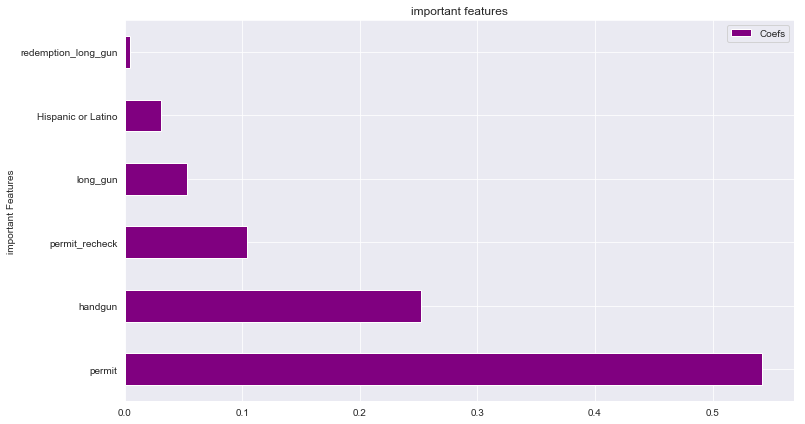

In [85]:
coefs_df.set_index('important Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(6).plot(kind='barh',title='important features', color='purple');


<a id='Evaluation'></a>

# Data Evaluation

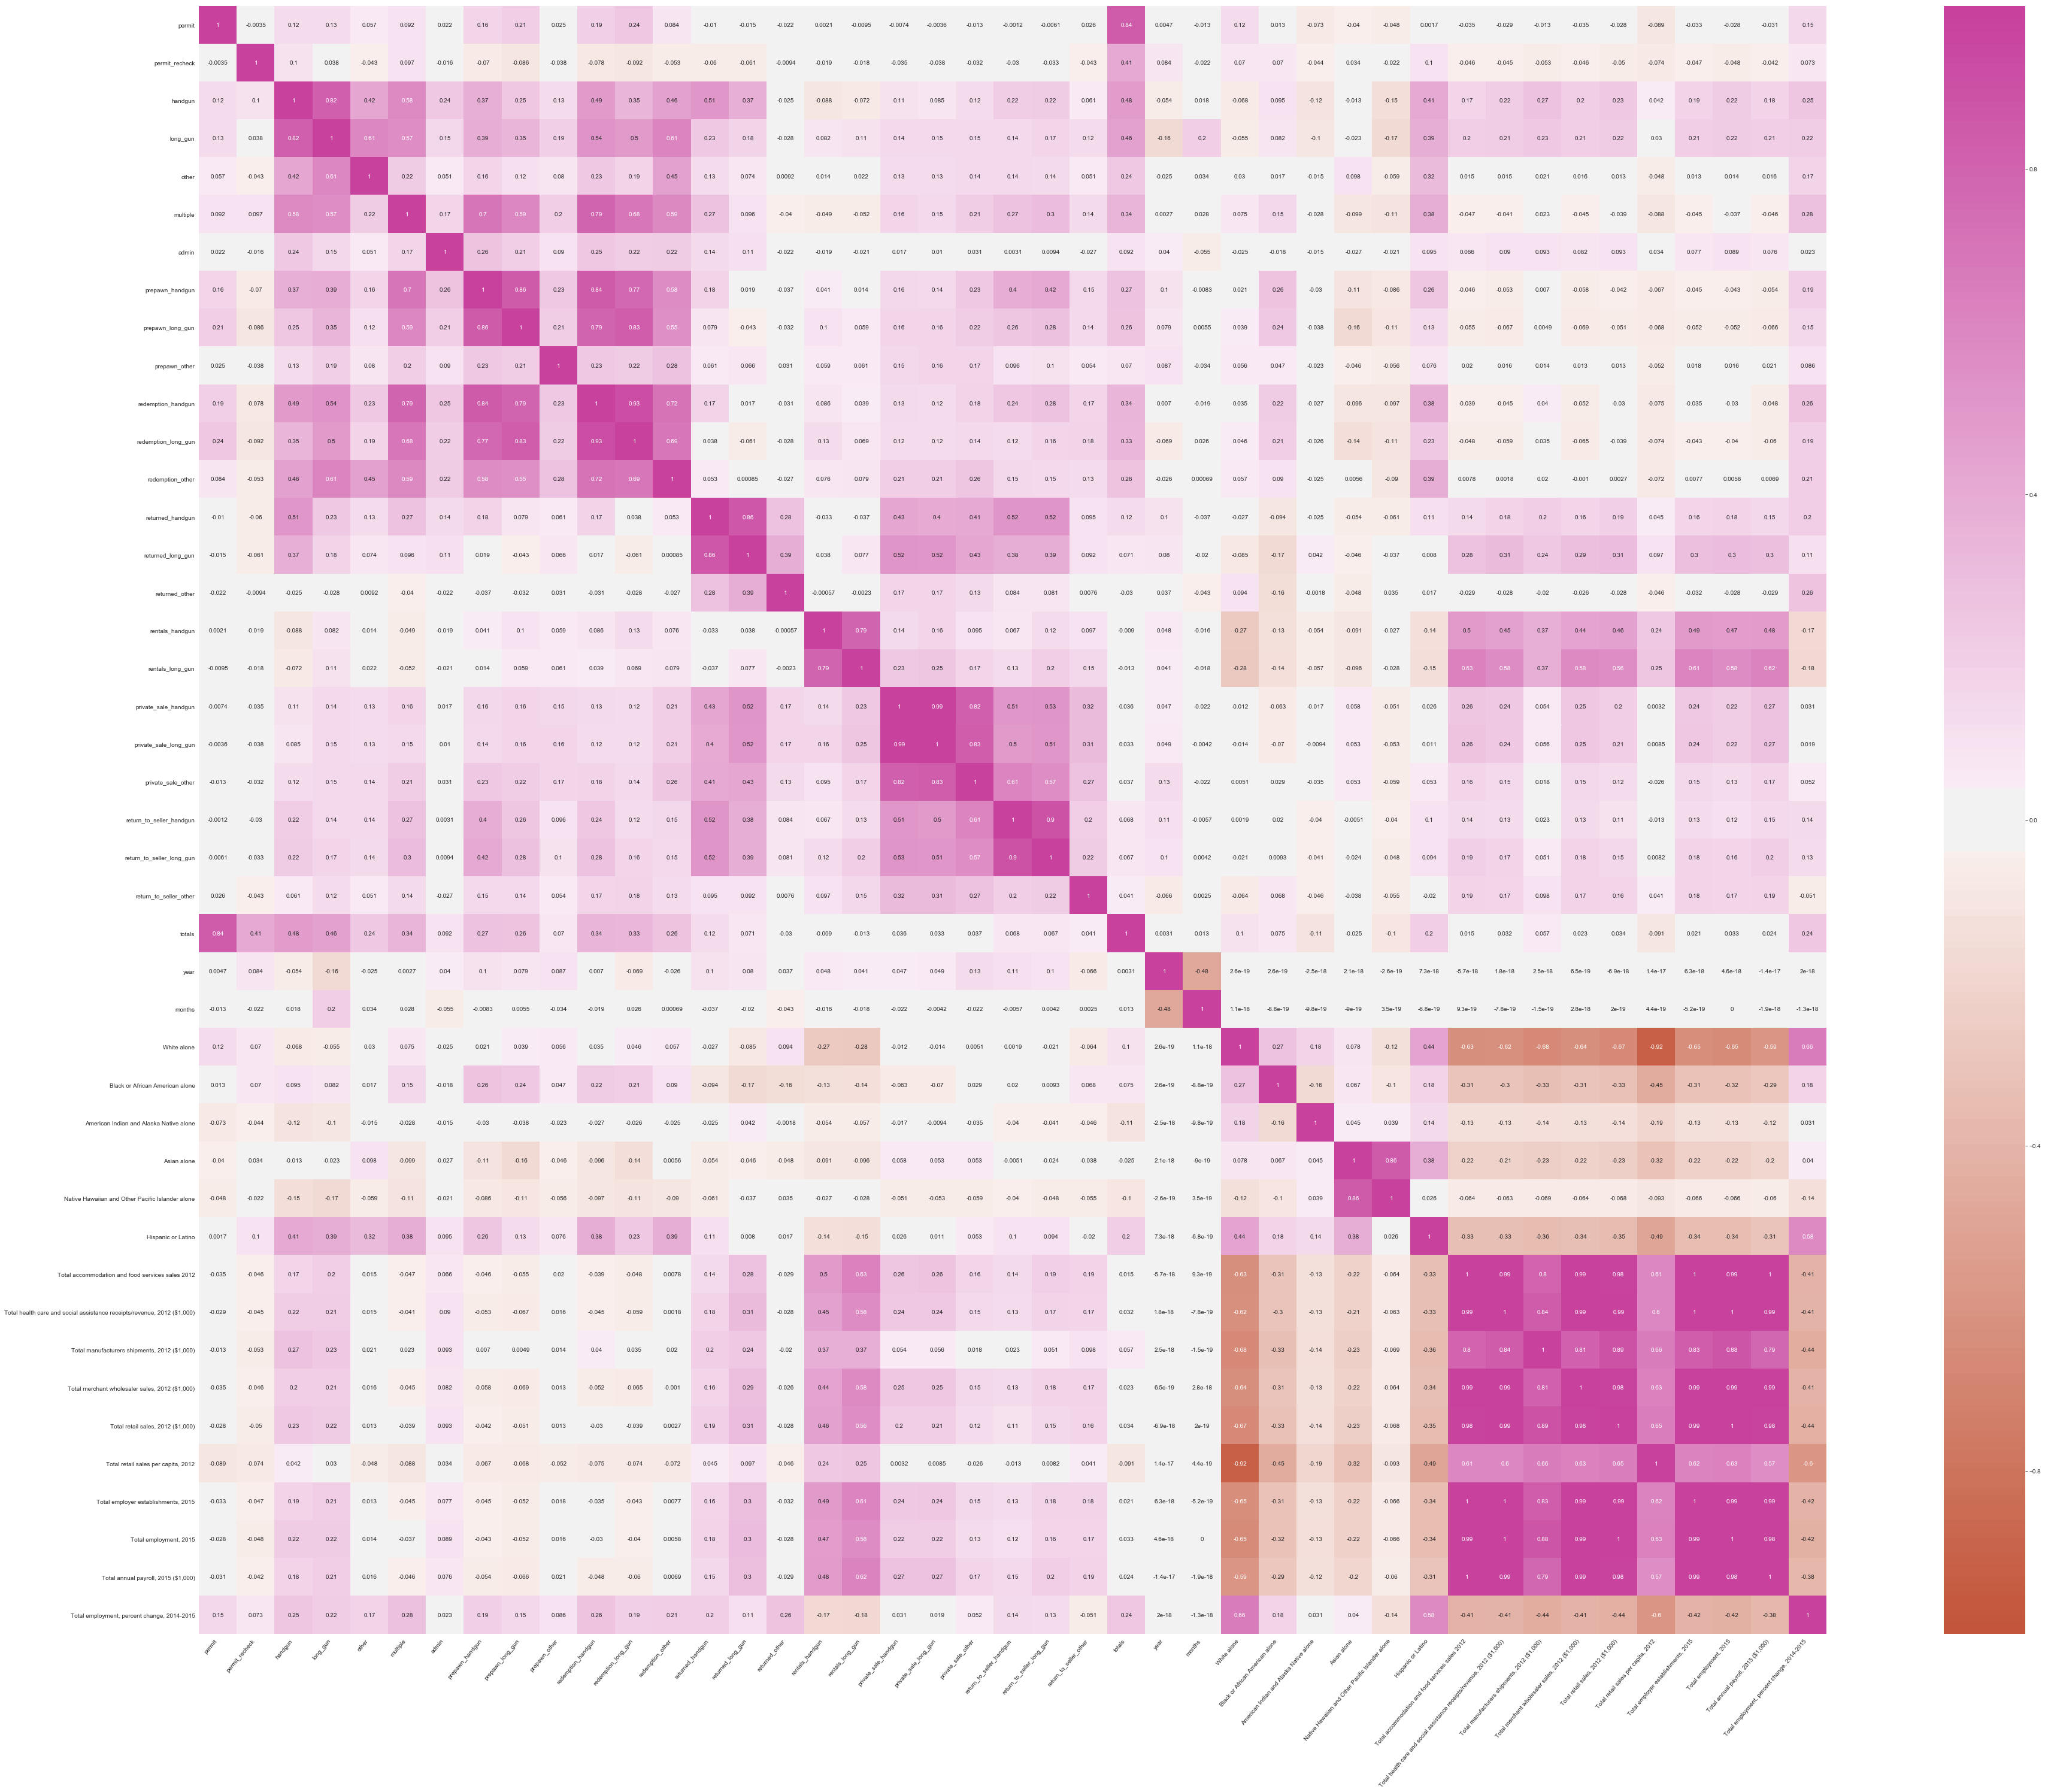

In [90]:
#heatmap plot
plt.subplots(figsize=(70,50))
corr = df_combined.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 330, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);





### As we can notes,
From the heatmap chart, we can found how the type of gun and permit can affect the results of their total purchase.

<a id='conclusions'></a>
## Conclusions:




Conclusions This analysis of this data helped me to see the whole picture of FBI guns in US state. the data allowed me to see trends of Purchases of guns between each states: and what I found from these data: the comparison between individual cannot be made with background checks, as I found it mentioned in the introduction to this analysis, but from asking the questions and working with data I found the answers that I worked for, which is about the states and months recorded the highest purchases of guns.

<a id='conclusions'></a>
## Resources

1- https://www.fbi.gov/services/cjis/nics

2- https://www.worldatlas.com/articles/us-states-with-the-largest-relative-hispanic-and-latino-populations.html

3- https://github.com/faro7ah/FBI-gun-project-DAND


In [51]:
df.to_csv('df.csv', index=False)
census_data.to_csv('census_data.csv', index=False)